퍼셉트론은 사람이 수동으로 가중치를 설정했다. 신경망은 가중치 매개변수를 자동으로 학습한다. 여기에서는 신경망의 개요를 설명하고, 신경망이 입력 데이터가 무엇인지 식별하는 처리 과정을 자세히 살펴본다.

# 1. 활성화 함수

### 1-1. Perceptron - Step Function

### Step Function 구현

In [1]:
def step_function(x):
    if x > 0:
        return 1
    else:
        return 0

위의 구현은 x가 실수만 가능하다.

In [2]:
def step_function(x):
    y = x > 0
    return y.astype(np.int)

In [4]:
import numpy as np
x = np.array([-1.0, 1.0, 2.0])
x

array([-1.,  1.,  2.])

In [5]:
y = x > 0 
y

array([False,  True,  True])

In [8]:
y = y.astype(np.int)
y

array([0, 1, 1])

### Step Function Graph

In [10]:
%matplotlib inline

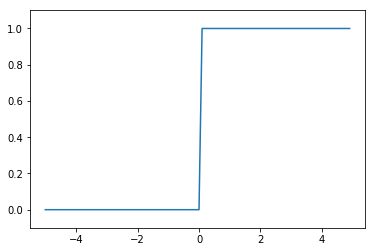

In [11]:
import numpy as np 
import matplotlib.pyplot as plt

def step_function(x):
    return np.array(x > 0, dtype=np.int)

x = np.arange(-5.0, 5.0, 0.1)
y = step_function(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1)
plt.show()

### 1-2. Sigomid Function

### Sigmoid Function 구현

In [12]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [13]:
x = np.array([-1.0, 1.0, 2.0])
sigmoid(x)

array([0.26894142, 0.73105858, 0.88079708])

### Sigmoid Graph

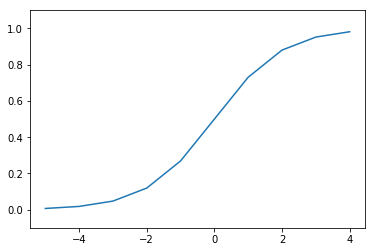

In [17]:
x = np.arange(-5.0, 5.0, 1)
y = sigmoid(x)
plt.plot(x,y)
plt.ylim(-0.1, 1.1)
plt.show()

### 1-3. ReLU Function

In [18]:
def relu(x):
    return np.maximum(0, x)

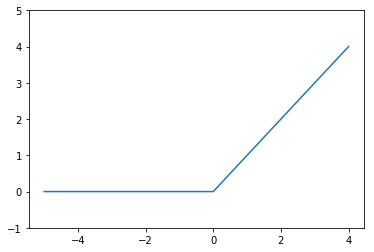

In [20]:
x = np.arange(-5.0, 5.0, 1)
y = relu(x)
plt.plot(x,y)
plt.ylim(-1.0, 5.0)
plt.show()

# 2. 다차원 배열 연산

### 1. 다차원 배열

In [21]:
import numpy as np
A = np.array([1,2,3,4])
print(A)
np.ndim(A)

[1 2 3 4]


1

In [22]:
A.shape

(4,)

In [23]:
A.shape[0]

4

In [24]:
B = np.array([[1,2],
              [3,4],
              [5,6]])
print(np.ndim(B))
B.shape

2


(3, 2)

### 2. 행렬의 내적

In [25]:
A = np.array([[1,2], [3,4]])
A.shape

(2, 2)

In [26]:
B = np.array([[5,6], [7,8]])
B.shape

(2, 2)

In [27]:
A.dot(B)

array([[19, 22],
       [43, 50]])

In [28]:
A = np.array([[1,2,3], [4,5,6]])
A.shape

(2, 3)

In [29]:
B = np.array([[1,2],[3,4],[5,6]])
B.shape

(3, 2)

In [32]:
A.dot(B)

array([[22, 28],
       [49, 64]])

In [33]:
A = np.array([[1,2],[3,4],[5,6]])
A.shape

(3, 2)

In [34]:
B = np.array([7,8])
B.shape

(2,)

In [35]:
np.dot(A, B)

array([23, 53, 83])

### 3. 신경망의 내적

In [36]:
X = np.array([1,2])
X.shape

(2,)

In [37]:
W = np.array([[1,3,5], [2,4,6]])
print(W)

[[1 3 5]
 [2 4 6]]


In [38]:
W.shape

(2, 3)

In [39]:
Y = np.dot(X, W)
print(Y)

[ 5 11 17]


# 3. 3층 신경망 구현하기

In [52]:
X = np.array([1.0, 0.5])

W1 = np.array([[0.1, 0.3, 0.5], 
               [0.2, 0.4, 0.6]])
B1 = np.array([0.1, 0.2, 0.3])

W2 = np.array([[0.1, 0.4],
               [0.2, 0.5],
               [0.3, 0.6]])
B2 = np.array([0.1, 0.2])

W3 = np.array([[0.1, 0.3],
               [0.2, 0.4]])
B3 = np.array([0.1 ,0.2])

In [53]:
def identity_function(x):
    return x

In [57]:
A1 = np.dot(X, W1) + B1
Z1 = sigmoid(A1)
print(A1.shape, Z1.shape)

(3,) (3,)


In [58]:
A2 = np.dot(Z1, W2) + B2
Z2 = sigmoid(A2)
print(A2.shape, Z2.shape)

(2,) (2,)


In [63]:
A3 = np.dot(Z2, W3) + B3
Y = identity_function(A3)
print(Z3.shape, Y.shape)

(2,) (2,)


In [64]:
print(Y)

[0.31682708 0.69627909]


# 4. 출력층 설계하기

### 1. Regression - identity function

In [65]:
def identity_function(x):
    return x

### 2. Classification - Softmax

In [66]:
a = np.array([0.3, 2.9, 4.0])

In [67]:
exp_a = np.exp(a)
print(exp_a)

[ 1.34985881 18.17414537 54.59815003]


In [68]:
sum_exp_a = np.sum(exp_a)
print(sum_exp_a)

y = exp_a / sum_exp_a
print(y)

74.1221542101633
[0.01821127 0.24519181 0.73659691]


In [69]:
c

In [70]:
a = np.array([1010, 1000, 990])
np.exp(a) / np.sum(np.exp(a))

/Users/sailyourlife/anaconda3/envs/nextopt/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  
/Users/sailyourlife/anaconda3/envs/nextopt/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  


array([nan, nan, nan])

In [71]:
c = np.max(a)
a - c

array([  0, -10, -20])

In [72]:
np.exp(a - c) / np.sum(np.exp(a - c))

array([9.99954600e-01, 4.53978686e-05, 2.06106005e-09])

In [73]:
def softmax(a):
    c = np.max(a)
    exp_a = np.exp(a - c)
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    return y

In [74]:
a = np.array([0.3, 2.9, 4.0])
y = softmax(a)
print(y)

[0.01821127 0.24519181 0.73659691]


In [75]:
np.sum(y)

1.0

# 5. 손 글씨 인식

### 1. Data

In [80]:
import sys, os
from mnist import load_mnist

In [81]:
(x_train, t_train), (x_test, t_test) = load_mnist(flatten=True, normalize=False)

Converting train-images-idx3-ubyte.gz to NumPy Array ...
Done
Converting train-labels-idx1-ubyte.gz to NumPy Array ...
Done
Converting t10k-images-idx3-ubyte.gz to NumPy Array ...
Done
Converting t10k-labels-idx1-ubyte.gz to NumPy Array ...
Done
Creating pickle file ...
Done!


In [82]:
print(x_train.shape)
print(t_train.shape)
print(x_test.shape)
print(t_test.shape)

(60000, 784)
(60000,)
(10000, 784)
(10000,)


In [89]:
from PIL import Image

def img_show(img):
    pil_img = Image.fromarray(np.uint8(img))
    pil_img.show()
    
(x_train, t_train), (x_test, t_test) = load_mnist(flatten=True, normalize=False)

In [90]:
img = x_train[0]
label = t_train[0]

In [91]:
print(img.shape)
img = img.reshape(28, 28)
print(img.shape)

img_show(img)

(784,)
(28, 28)


### 2. Neural Netowrk

In [92]:
import pickle

In [97]:
def get_data():
    (x_train, t_train), (x_test, t_test) = load_mnist(normalize=False, flatten=True, one_hot_label=False)
    return x_test, t_test

def init_network():
    with open('sample_weight.pkl', 'rb') as f:
        network = pickle.load(f)
        
    return network

In [101]:
def predict(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']
    
    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = softmax(a3)
    
    return y

In [102]:
x, t = get_data()
network = init_network()

In [103]:
accuracy_cnt = 0
for i in range(len(x)):
    y = predict(network, x[i])
    p = np.argmax(y)
    if p == t[i]:
        accuracy_cnt += 1
        
print("Accuracy: " + str(float(accuracy_cnt) / len(x)))

/Users/sailyourlife/anaconda3/envs/nextopt/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


Accuracy: 0.9207


### 3. Batch 처리

In [104]:
x, _ = get_data()
network = init_network()
W1, W2, W3 = network['W1'], network['W2'], network['W3']

In [105]:
x.shape

(10000, 784)

In [106]:
x[0].shape

(784,)

In [107]:
print(W1.shape, W2.shape, W3.shape)

(784, 50) (50, 100) (100, 10)


In [114]:
x, t = get_data()
network = init_network()

batch_size = 100
accuracy_cnt = 0

for i in range(0, len(x), batch_size):
    x_batch = x[i:i+batch_size]
    y_batch = predict(network, x_batch)
    p = np.argmax(y_batch, axis=1)
    accuracy_cnt += np.sum(p == t[i:i+batch_size])
    
print("Accuracy: " + str(float(accuracy_cnt)/len(x)))

Accuracy: 0.9207


/Users/sailyourlife/anaconda3/envs/nextopt/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


In [115]:
x = np.array([
    [0.1, 0.8, 0.1],
    [0.3, 0.1, 0.6],
    [0.2, 0.5, 0.3],
    [0.8, 0.1, 0.1]
])
y = np.argmax(x, axis=1)
print(y)

[1 2 1 0]
